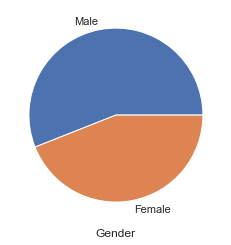

In [1]:
#2.1 Data loading and Statistical Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "ticks", color_codes = True)


file = pd.read_csv("Mall_customers.csv")



#2.1 a)
pd.get_dummies(file, columns = ['Gender'])

counts = file['Gender'].value_counts()
labels = ['Male','Female']

plt.pie(counts,labels = labels)
plt.xlabel("Gender")
plt.show()


array([[<AxesSubplot:title={'center':'Annual Income (k$)'}>]],
      dtype=object)

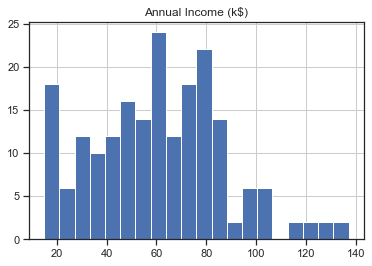

In [2]:
#2.1 b) For the numerical feature Annual Income, draw a histogram showcasing the distrubution over 20 bins

file.hist(column = 'Annual Income (k$)',bins = 20)

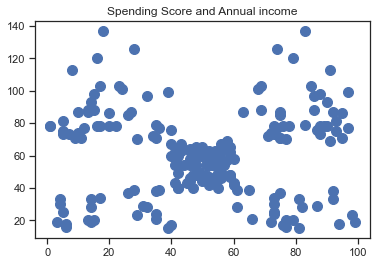

In [3]:
#2.1 c) For two numerical features Spending Score and Annual income, exploit a scatter plot to demonstrate how these
#two variables are related to each other 
bud = file['Annual Income (k$)']
cud = file['Spending Score (1-100)']
AIset = []
SSset = []


for x in bud:
    AIset.append(x)

for y in cud:
    SSset.append(y)


plt.title("Spending Score and Annual income")
plt.scatter(SSset, AIset, s = 100)

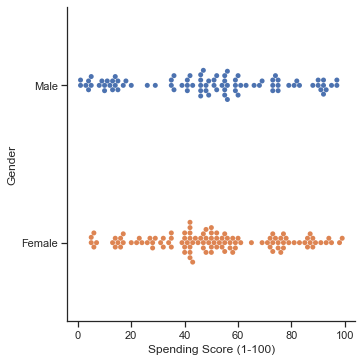

In [4]:
#2.1 d) For a pair of numerical feature and ceategorical feature Spending Score
#and Gender , plot the Spending Score distibution based on Gender

sns.catplot(x = 'Spending Score (1-100)', y = 'Gender', kind = 'swarm' , data = file)

,Age
count,200.000000
mean,38.850000
std,13.969007
min,18.000000
25%,28.750000
50%,36.000000
75%,49.000000
max,70.000000


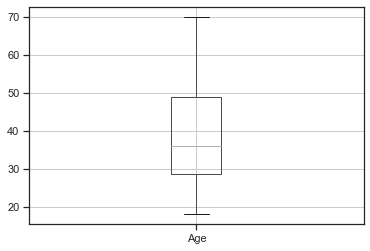

In [5]:
#3)Identify outliers
#a)For three numerical features Spending Score,Annual Income and Age draw boxplots which graphically depict the data
#distirbutions and the outliers defined over a five-number summary: the minimum, the maximum, the sample median,and
#the first and third quartiles
a = file.iloc[:,[2]]
a.boxplot()
a.describe()


,AI
count,200.000000
mean,60.560000
std,26.264721
min,15.000000
25%,41.500000
50%,61.500000
75%,78.000000
max,137.000000


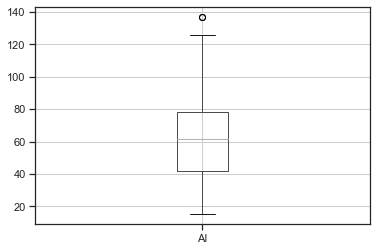

In [6]:
b = file.iloc[:,[3]]
b = b.rename(columns = {'Annual Income (k$)':'AI'})
b.boxplot()
b.describe()

,SS
count,200.000000
mean,50.200000
std,25.823522
min,1.000000
25%,34.750000
50%,50.000000
75%,73.000000
max,99.000000


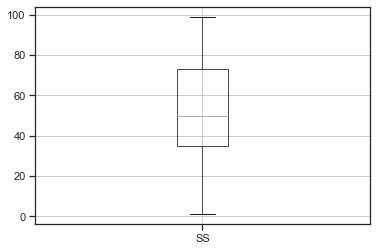

In [7]:

c = file.iloc[:,[4]]
c = c.rename(columns = {'Spending Score (1-100)':'SS'})
c.boxplot()
c.describe()

In [8]:
#3)Identify outliers
#b)Calculate the percentage of outliers presented in each variable
#Note that a record might be an outlier if its value is greater than
#Q3+1.5QR or is lower than Q1-1.5IQR

#Age 
Q1 = a.Age.quantile(0.25)
Q3 = a.Age.quantile(0.75)

Q1, Q3
IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
lower_limit, high_limit

a[(a.Age<lower_limit)|(a.Age > high_limit)]


,Age


In [9]:
print("0 outliers")

0 outliers


In [10]:
#Annual Income(k$)
Q1 = b.AI.quantile(0.25)
Q3 = b.AI.quantile(0.75)

Q1, Q3
IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
lower_limit, high_limit

b[(b.AI<lower_limit)|(b.AI > high_limit)]



,AI
198,137
199,137


In [11]:
print("There are two outliers")
print("The percnetage of outliers is ",((2/200) * 100),"%")

There are two outliers
The percnetage of outliers is  1.0 %


In [12]:
#Spending Score
Q1 = c.SS.quantile(0.25)
Q3 = c.SS.quantile(0.75)

Q1, Q3
IQR = Q3 - Q1
IQR

lower_limit = Q1 - 1.5*IQR
high_limit = Q3 + 1.5*IQR
lower_limit, high_limit

c[(c.SS<lower_limit)|(c.SS > high_limit)]

,SS


In [13]:
print("0 outliers")

0 outliers


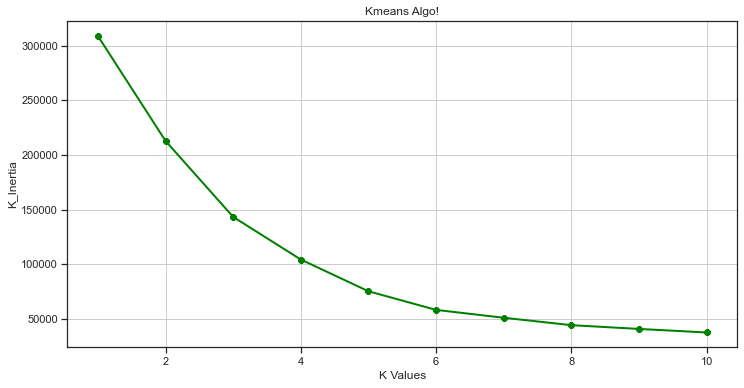

In [14]:
#Question 2.2
#KMeans

import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline
from sklearn.cluster import KMeans

a_ai_ss = []

dataset = file.iloc[:,[2,3,4]]
dataset

for k in range(1,11):
    km = KMeans(n_clusters = k, init ='k-means++')
    km.fit(dataset)
    
    a_ai_ss.append(km.inertia_)
    
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),a_ai_ss,linewidth = 2, color = 'green', marker = '8')

plt.xlabel('K Values')
plt.ylabel('K_Inertia')
plt.title("Kmeans Algo!")
plt.show()

In [15]:
#Based of the graph I believe the answer is 4!
newset = dataset.iloc[:,[1, 2]]

Text(0, 0.5, 'Annual Income')

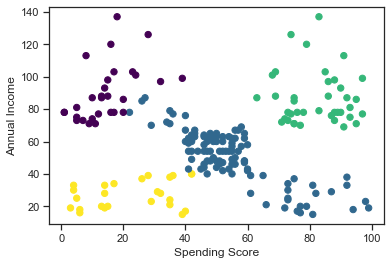

In [16]:
#Gaussian Mixture
import warnings
warnings.filterwarnings('ignore')
from sklearn.mixture import GaussianMixture as GMM

gg = GMM(n_components = 4)

gg.fit(newset)

cl = gg.predict(newset)
plt.scatter(newset.iloc[:,1],newset.iloc[:,0], c = cl, s= 40, cmap = 'viridis')
plt.xlabel("Spending Score")
plt.ylabel("Annual Income")


Text(0, 0.5, 'Annual Income')

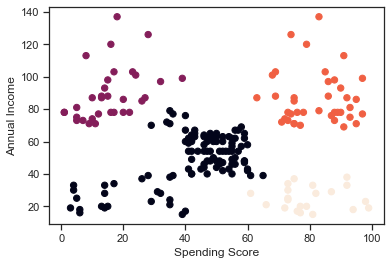

In [17]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering as AC

ggg = AC(n_clusters = 4, linkage = 'ward')

ggg.fit(newset)
labels = ggg.labels_
plt.scatter(newset.iloc[:,1],newset.iloc[:,0], s= 40, c = labels)

plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

Text(0, 0.5, 'Annual Income')

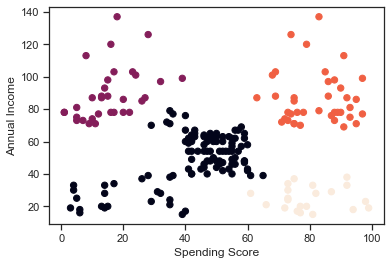

In [18]:
#DBScan
from sklearn.cluster import DBSCAN 

gggg = DBSCAN(eps = 6, min_samples = 3)

gggg.fit(newset)
plt.scatter(newset.iloc[:,1],newset.iloc[:,0], s= 40, c = labels)

plt.xlabel("Spending Score")
plt.ylabel("Annual Income")

In [19]:
#2.3
#From the data above I have found that the data is relativley similar
#for each one. Each algorithim seems to have different parameters
#gaussian take n_components, agglomerative takes n_clusters which are 4.
#However DBSCAN takes different parameters for the function which are
#eps = 6 & min_samples = 3, i also notices that for gaussian has color
#but the colors habve to be changed for DBSCAN and Agglomerative 
#clustering. Overall they result in the same results and each
#method is different in its own way but it gets you what you
#are looking for with the use of different algorithims. I